In [6]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [7]:
# Paramètres des deux distributions bêta
alpha1, beta1 = 2, 5
alpha2, beta2 = 3, 4

# Création de l'échantillon des valeurs
x = np.linspace(0, 1, 1000)

# Calcul des PDF des deux distributions bêta
pdf1 = beta.pdf(x, alpha1, beta1)
pdf2 = beta.pdf(x, alpha2, beta2)

# Calcul de la probabilité de recouvrement
overlap_surface = np.minimum(pdf1, pdf2)
overlap_prob = np.trapz(np.minimum(pdf1, pdf2), x)

print("Probabilité de recouvrement entre les deux distributions bêta :", overlap_prob)


Probabilité de recouvrement entre les deux distributions bêta : 0.6707826352275587


Text(0.5, 1.0, 'overlap=0.67')

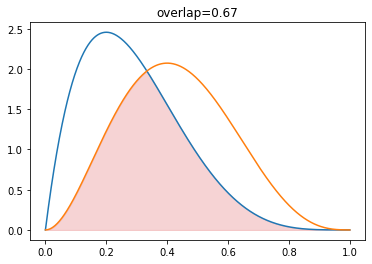

In [8]:
plt.plot(x, pdf1)
plt.plot(x, pdf2)
plt.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
plt.title(f'overlap={overlap_prob:.2f}')

## Implication : A--> B (H1) et A --> non-B (H0)

In [9]:
def log_likelihood(q, x):
    # Calcul de la log-vraisemblance conditionnelle
    return x * np.log(q) + (1 - x) * np.log(1 - q)

In [10]:
def simple_implication(data):
    plt.figure(figsize=(30,20))
    H0 = ((0,0), (0,1), (1,0))
    #H0 = ((1,0)) #non : A --> B
    H1 = ((0,0), (0,1), (1,1)) # A --> nB
    beta_ = {'H0':[1,1], 'H1':[1,1], 'H_ref':[1,1]}
    log_lik_ref = 0
    log_lik_0 = 0
    log_lik_1 = 0
    for i, obs in enumerate(data):
        ax = plt.subplot(5,5,i+1)
        
        if obs in H0:
            beta_['H0'][0] += 1
            h0 = 1
        else:
            beta_['H0'][1] += 1         
            h0 = 0
            
        if obs in H1:
            beta_['H1'][0] += 1
            h1 = 1
        else:
            beta_['H1'][1] += 1
            h1 = 0
         
        beta_['H_ref'][obs[1]] += 1
        
        '''h_ref = int(obs[0]==1 or obs[1] == 1)
        if obs[0]==1 or obs[1] == 1:
            beta_['H_ref'][0] += 1
        else:
            beta_['H_ref'][1] += 1'''
        
        ll, _ = quad(lambda q: log_likelihood(q, h0) * beta.pdf(q, beta_['H0'][0], beta_['H0'][1]), 0, 1) 
        log_lik_0 += ll
        ll, _ = quad(lambda q: log_likelihood(q, h1) * beta.pdf(q, beta_['H1'][0], beta_['H1'][1]), 0, 1) 
        log_lik_1 += ll
        ll, _ = quad(lambda q: log_likelihood(q, obs[1]) * beta.pdf(q, beta_['H_ref'][0], beta_['H_ref'][1]), 0, 1) 
        log_lik_ref += ll
        
        pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
        pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
        ax.plot(x, pdf_H0, label=r'H0: $A \rightarrow \neg B$', color='tab:orange')
        ax.plot(x, pdf_H1, label=r'H1: $A \rightarrow B$', color='tab:blue')
        overlap_surface = np.minimum(pdf_H0, pdf_H1)
        overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        ax.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
        
        #KL_0 = np.sum(np.where(pdf_H0 != 0, pdf_H0 * np.log(pdf_H0 / pdf_ref), 0))
        KL_0, _ = quad(lambda q: beta.pdf(q, beta_['H0'][0], beta_['H0'][1]) * np.log(beta.pdf(q, beta_['H0'][0], beta_['H0'][1])/ beta.pdf(q, 1, i+1)), 0, 1)
        print(i+1, "FE 0:", log_lik_0, KL_0)
        FE_0 = - log_lik_0 + KL_0
        #KL_1 = np.sum(np.where(pdf_H1 != 0, pdf_H1 * np.log(pdf_H1 / pdf_ref), 0))
        KL_1, _ = quad(lambda q: beta.pdf(q, beta_['H1'][0], beta_['H1'][1]) * np.log(beta.pdf(q, beta_['H1'][0], beta_['H1'][1])/ beta.pdf(q, i+1, 1)), 0, 1)
        FE_1 = - log_lik_1 + KL_1
        print(i+1, "FE 1:", log_lik_1, KL_1)
        
        ax.set_title(f'#{i+1}, FE_0:{FE_0:.2f}, FE_1:{FE_1:.2f}')
        ax.text(0.05,4.5,f'A={obs[0]}')
        ax.text(0.05,4.1,f'B={obs[1]}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)

    

In [11]:
# (A,B) observations
data = ((0,1), (1,0), (0,0), (1,1), (1,1), (1,1), (0,1), (0,0), (1,1), (1,1))

1 FE 0: -0.49999999999999983 0.19314718055994534
1 FE 1: -0.49999999999999983 0.19314718055994534
2 FE 0: -0.8333333333332017 1.5721317747751233
2 FE 1: -1.3333333333333335 0.26527895533477636
3 FE 0: -1.083333333331637 3.704348739123134
3 FE 1: -1.9166666666661591 0.30296102778655903
4 FE 0: -2.3666666666649587 2.826104579124472
4 FE 1: -2.3666666666582494 0.3261045791007788
5 FE 0: -3.3166666666646467 2.534906649791825
5 FE 1: -2.733333333329157 0.3417594692281055
6 FE 0: -4.076190476184976 2.390359143860918
6 FE 1: -3.0428571428528124 0.3530530061983724
7 FE 0: -4.710714285710039 3.8043556445641182
7 FE 1: -3.3107142857099623 0.36158439882405435
8 FE 0: -5.25634920634298 5.397499805706097
8 FE 1: -3.546825396821073 0.36825632336615843
9 FE 0: -6.101984126983689 5.096007501997913
9 FE 1: -3.7579365079321843 0.3736168390246863
10 FE 0: -6.838528138527534 4.888195255783396
10 FE 1: -3.948845598841275 0.37801792791996053


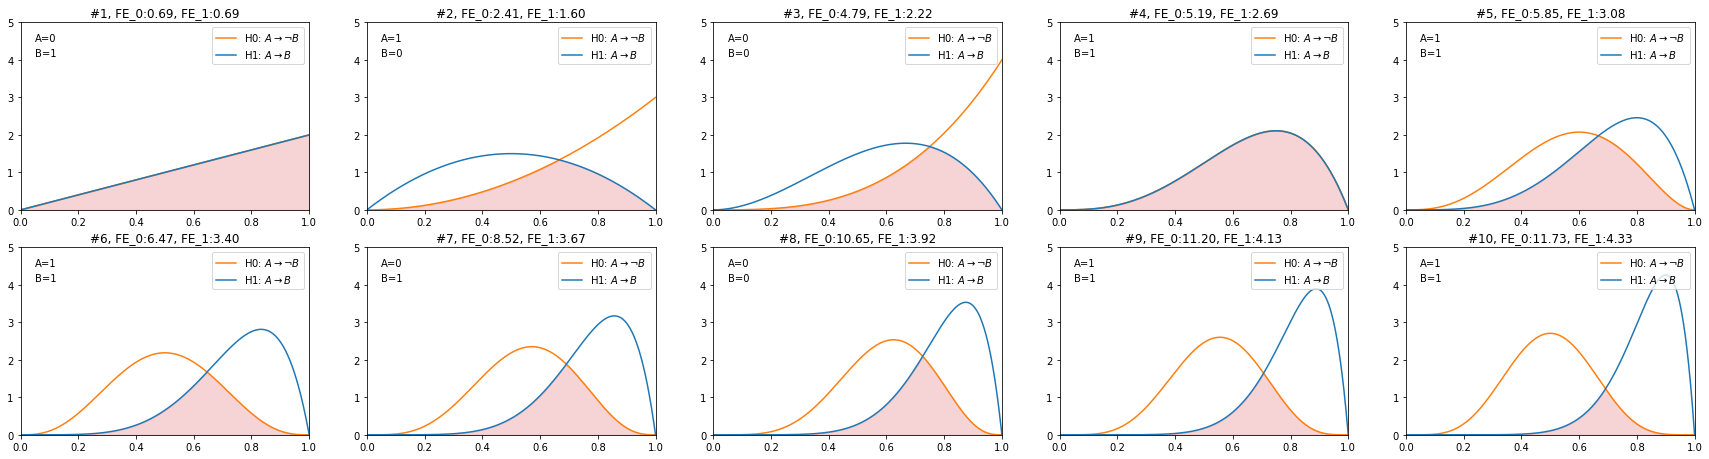

In [12]:
simple_implication(data)

### Baseline

In [13]:
data = ((1,1), (1,1), (1,1), (1,1), (1,1))

1 FE 0: -0.4999999999999997 0.1931471805599453
1 FE 1: -0.49999999999999983 0.19314718055994534
2 FE 0: -0.8333333333332016 0.07213177477496271
2 FE 1: -0.8333333333332017 0.07213177477496269
3 FE 0: -1.0833333333316368 0.03768207245334547
3 FE 1: -1.083333333331637 0.0376820724533455
4 FE 0: -1.283333333332326 0.023143551313520652
4 FE 1: -1.283333333332326 0.02314355131352061
5 FE 0: -1.4499999999989712 0.01565489012730933
5 FE 1: -1.4499999999989714 0.015654890127309393


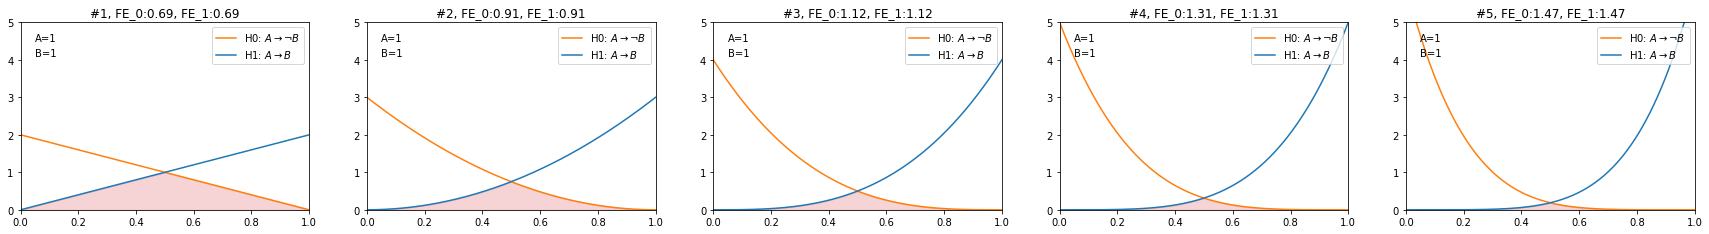

In [14]:
simple_implication(data)

### US preexposure effect

In [15]:
# (A,B) observations
data = ((0,1), (0,1), (0,1), (0,1), (0,1), (1,1), (1,1), (1,1), (1,1), (1,1))
#data = ((1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1))

1 FE 0: -0.49999999999999983 0.19314718055994534
1 FE 1: -0.49999999999999983 0.19314718055994534
2 FE 0: -0.8333333333332017 1.5721317747751233
2 FE 1: -0.8333333333332017 0.07213177477496269
3 FE 0: -1.083333333331637 3.704348739123134
3 FE 1: -1.083333333331637 0.0376820724533455
4 FE 0: -1.283333333332326 6.273143551314128
4 FE 1: -1.283333333332326 0.02314355131352061
5 FE 0: -1.4499999999989714 9.14898822346065
5 FE 1: -1.4499999999989714 0.015654890127309393
6 FE 0: -3.0428571428559126 6.769719672864042
6 FE 1: -1.5928571428561151 0.011293536970114782
7 FE 0: -4.260714285712945 5.876863354154157
7 FE 1: -1.7178571428561151 0.00853139262452236
8 FE 0: -5.2563492063352 5.397499805706097
8 FE 1: -1.8289682539672263 0.006671924545272665
9 FE 0: -6.101984126975909 5.096007501997913
9 FE 1: -1.9289682539672262 0.005360515657825994
10 FE 0: -6.838528138519753 4.888195255783396
10 FE 1: -2.019877344876317 0.00440108889523432


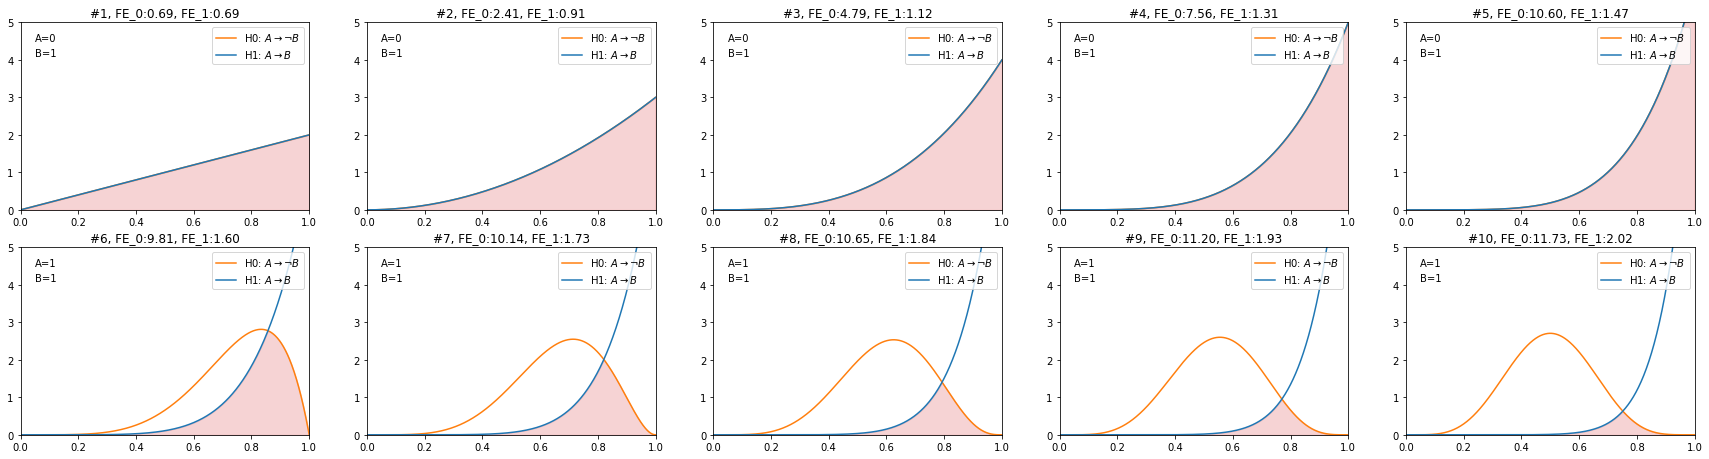

In [16]:
simple_implication(data)

### CS preexposure effect

In [17]:
# (A,B) observations
data = ((1,0), (1,0), (1,0), (1,0), (1,0), (1,1), (1,1), (1,1), (1,1), (1,1),)
#data = ((1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1))

1 FE 0: -0.49999999999999983 0.19314718055994534
1 FE 1: -0.4999999999999997 0.1931471805599453
2 FE 0: -0.8333333333332017 1.5721317747751233
2 FE 1: -0.8333333333332016 1.5721317747751244
3 FE 0: -1.083333333331637 3.704348739123134
3 FE 1: -1.0833333333316368 3.704348739123134
4 FE 0: -1.283333333332326 6.273143551314128
4 FE 1: -1.283333333332326 6.2731435513141305
5 FE 0: -1.4499999999989714 9.14898822346065
5 FE 1: -1.4499999999989712 9.148988223460671
6 FE 0: -3.0428571428559126 6.769719672864042
6 FE 1: -3.0428571428559135 6.769719672864043
7 FE 0: -4.260714285712945 5.876863354154157
7 FE 1: -4.260714285712946 5.876863354154156
8 FE 0: -5.2563492063352 5.397499805706097
8 FE 1: -5.2563492063352015 5.397499805706096
9 FE 0: -6.101984126975909 5.096007501997913
9 FE 1: -6.1019841269759105 5.096007501997914
10 FE 0: -6.838528138519753 4.888195255783396
10 FE 1: -6.838528138519755 4.888195255783395


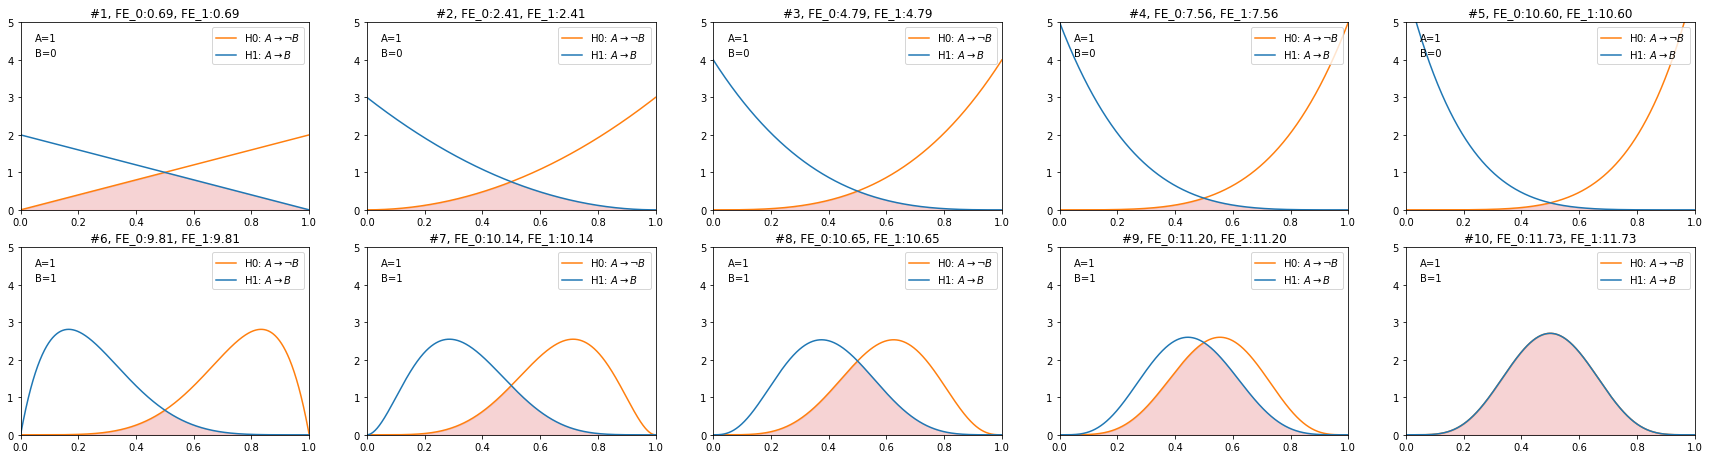

In [18]:
simple_implication(data)

## Cue competition : A, X, --> B

  * H0 : non(A --> B) ou non(X --> B) : (A et non-B) ou (X et non-B)
  * H1 : A --> B et X --> B : (non-A ou B) et (non-X ou B) : (non-A et non-X) ou (non-A et B) ou (B et non-X) ou B   
                                                           : (non-A et non-X) ou B 
  * H0 : (A ou X) --> non-B : non(A ou X) ou non-B : (non-A et non-X) ou non-B
  * H1 : (A ou X) --> B : non(A ou X) ou B : (non-A et non-X) ou B
  * H2 : A --> B : non(A)  ou B 
  * H3 : X --> B : non(X) ou B 
 


In [19]:
def cue_competition_implication(data):
    plt.figure(figsize=(30,20))
    H0 = ((0,0,0), (0,0,1),
      (0,1,0),(0,1,1),(1,0,0),(1,1,0))
    H1 = ((0,0,0), (0,0,1),
      (0,1,0),(1,0,0),(1,0,1),(1,1,0))
    
    H2 = ((0,0,0), (0,1,0), (0,0,1), (0,1,1),
      (1,0,1), (1,1,1))
   
    H3 = ((0,0,0), (1,0,0), (0,0,1), (1,0,1),
      (0,1,1), (1,1,1))
    beta_ = {'H0':[1,1], 'H1':[1,1],'H2':[1,1], 'H3':[1,1]}
    for i, obs in enumerate(data):
        ax = plt.subplot(5,5,i+1)
        if obs in H0:
            beta_['H0'][0] += 1
        else:
            beta_['H0'][1] += 1
        if obs in H1:
            beta_['H1'][0] += 1
        else:
            beta_['H1'][1] += 1
        if obs in H2:
            beta_['H2'][0] += 1
        else:
            beta_['H2'][1] += 1
        if obs in H3:
            beta_['H3'][0] += 1
        else:
            beta_['H3'][1] += 1
        pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
        pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
        pdf_H2 = beta.pdf(x, beta_['H2'][0], beta_['H2'][1])
        pdf_H3 = beta.pdf(x, beta_['H3'][0], beta_['H3'][1])
        #ax.plot(x, pdf_H0, label=r'H0: $\neg (A \rightarrow B) \vee \neg (X \rightarrow B)$', color='tab:orange')
        #ax.plot(x, pdf_H1, label=r'H1: $A \rightarrow B \wedge X \rightarrow B$', color='tab:blue')
        ax.plot(x, pdf_H0-0.03, label=r'H0: $A   \rightarrow \neg B$', color='tab:orange')
        ax.plot(x, pdf_H1, label=r'H1: $X  \rightarrow \neg B$', color='tab:red')
        ax.plot(x, pdf_H2+0.03, label=r'H2: $A \rightarrow B$', color='tab:green')
        ax.plot(x, pdf_H3+0.06, label=r'H3: $X \rightarrow B$', color='tab:purple')
        overlap_surface_1 = np.minimum(pdf_H0, pdf_H2)
        overlap_surface_2 = np.minimum(pdf_H1, pdf_H3)
        overlap_prob_1 = np.trapz(np.minimum(pdf_H0, pdf_H2), x)
        overlap_prob_2 = np.trapz(np.minimum(pdf_H1, pdf_H3), x)
        ax.fill_between(x, np.zeros_like(overlap_surface_1), overlap_surface_1, color='tab:green', alpha=.2)
        ax.fill_between(x, np.zeros_like(overlap_surface_2), overlap_surface_2, color='tab:purple', alpha=.2)
        ax.set_title(f'#{i+1}, ovl1={overlap_prob_1:.2f}, ovl2={overlap_prob_2:.2f}')
        ax.text(0.05,4.5,f'A={obs[0]}')
        ax.text(0.05,4.1,f'X={obs[1]}')
        ax.text(0.05,3.7,f'B={obs[2]}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)

    

In [13]:
data = ((1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,0,0), (1,0,0), (1,0,0), (1,0,0), (1,0,0))

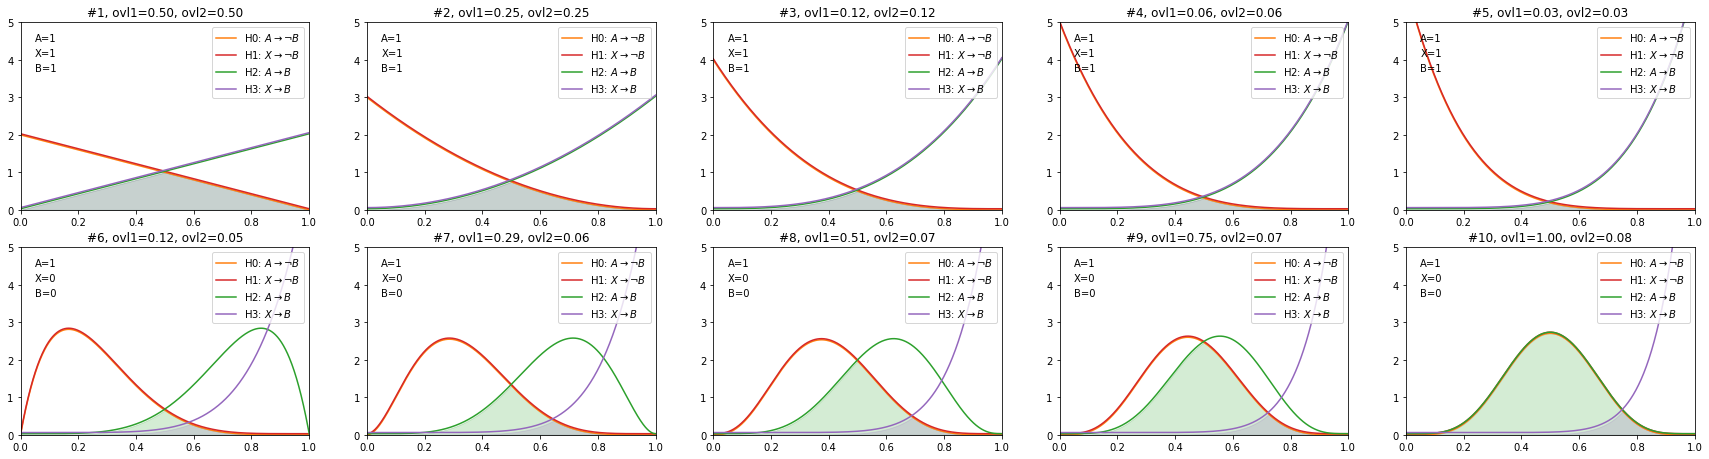

In [14]:
cue_competition_implication(data)

## Blocking

In [15]:
data = ((1,0,1), (1,0,1), (1,0,1), (1,0,1), (1,0,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1))

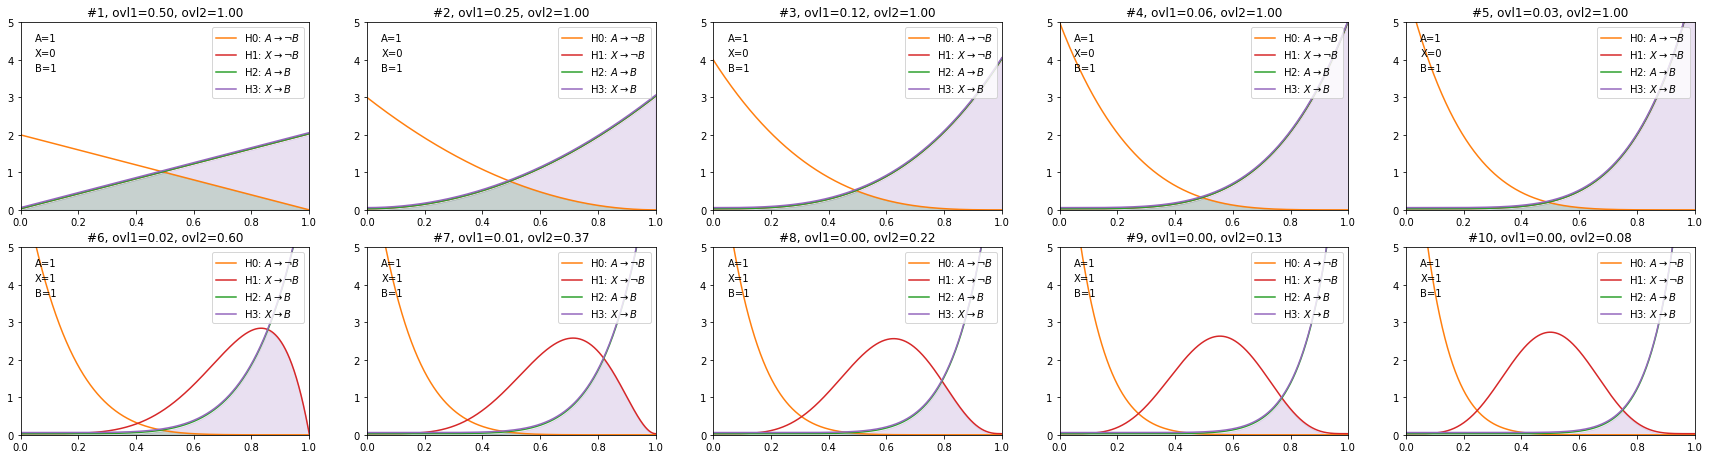

In [16]:
cue_competition_implication(data)

## Retrospective reevaluation : A, X, --> B

In [23]:
data = ((1,0,1), (1,0,1), (1,0,1), (1,0,1), (1,0,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,1,1), (1,0,0), (1,0,0), (1,0,0), (1,0,0), (1,0,0))

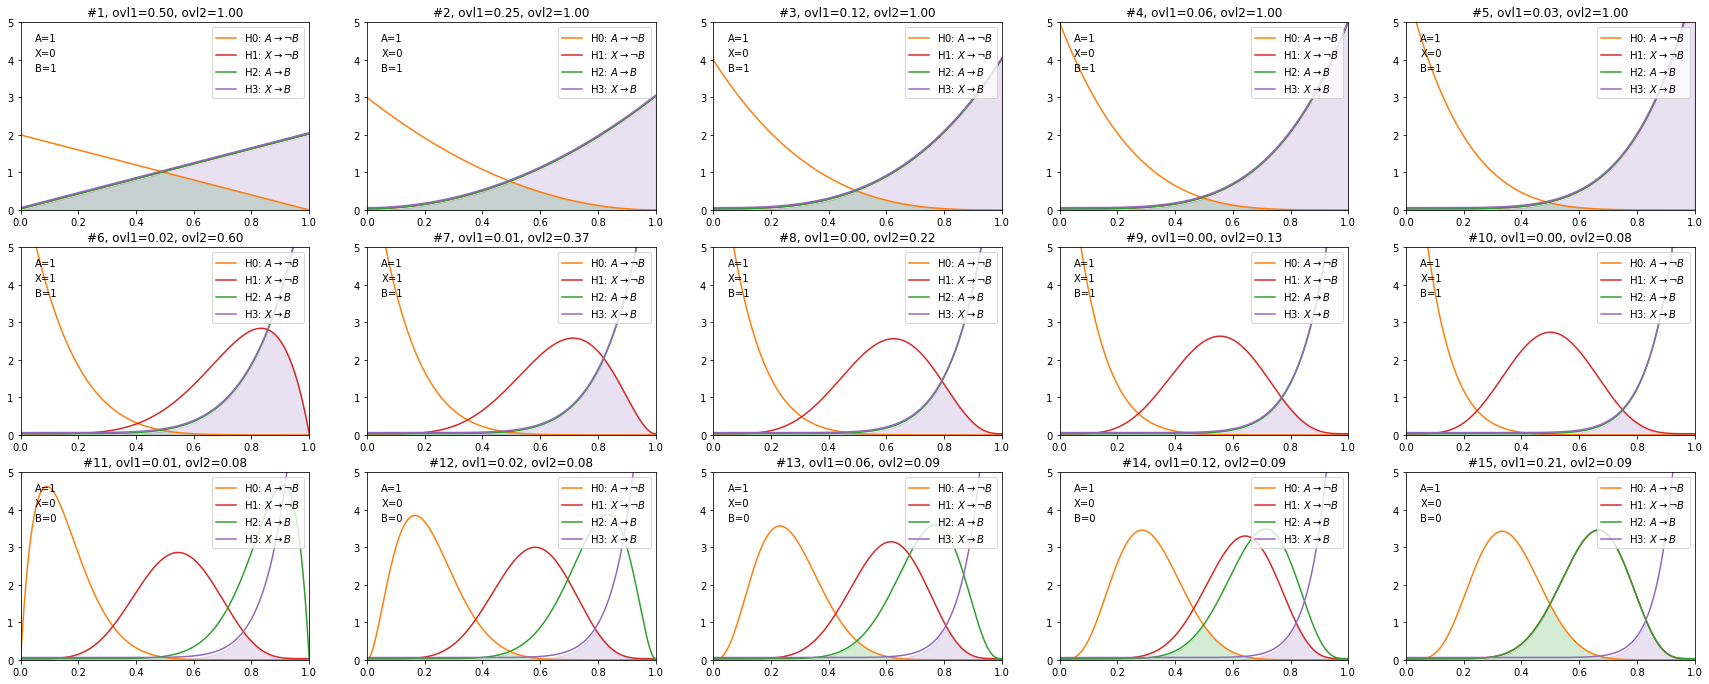

In [24]:
cue_competition_implication(data)

## Modelling contextual effect (Renewal)

H0 = A --> B = non-A ou B 

H1 = C1 --> (A --> B) = C1 --> non-A ou B = non-C1 ou (non-A ou B) 

H2 = C2 --> (A --> non-B) = C2 --> non-A ou non-B = non-C2 ou (non-A ou non-B) 

In [57]:
def contextual_effect_implication(data):
    plt.figure(figsize=(30,20))
    H0 = ((0,0,0,0), (0,0,0,1), (0,0,1,1),
      (0,1,0,0), (0,1,0,1), (0,1,1,1),
      (1,0,0,0), (1,0,0,1), (1,0,1,1),
      (1,1,0,0), (1,1,0,1), (1,1,1,1),)
    #H0 = ((1,0)) #non : A --> B
    H1 = ((0,0,0,0), (0,0,0,1), (0,0,1,0), (0,0,1,1),
          (0,1,0,0), (0,1,0,1), (0,1,1,0), (0,1,1,1),
          (1,0,0,0), (1,0,0,1), (1,0,1,1),
          (1,1,0,0), (1,1,0,1), (1,1,1,1))
    H2 = ((0,0,0,0), (0,0,0,1), (0,0,1,0), (0,0,1,0),
          (1,0,0,0), (1,0,0,1), (1,0,1,0), (1,0,1,1),
          (0,1,0,0), (0,1,0,1), (0,1,1,0),
          (1,1,0,0), (1,1,0,1), (1,1,1,0))
    beta_ = {'H0':[1,1], 'H1':[1,1], 'H2':[1,1]}
    for i, obs in enumerate(data):
        ax = plt.subplot(5,5,i+1)
        if obs in H0:
            beta_['H0'][0] += 1
        else:
            beta_['H0'][1] += 1
        if obs in H1:
            beta_['H1'][0] += 1
        else:
            beta_['H1'][1] += 1
        if obs in H2:
            beta_['H2'][0] += 1
        else:
            beta_['H2'][1] += 1
        
        pdf_H0 = beta.pdf(x, beta_['H0'][0], beta_['H0'][1])
        pdf_H1 = beta.pdf(x, beta_['H1'][0], beta_['H1'][1])
        pdf_H2 = beta.pdf(x, beta_['H2'][0], beta_['H2'][1])
        #ax.plot(x, pdf_H0, label=r'H0: $\neg (A \rightarrow B) \vee \neg (X \rightarrow B)$', color='tab:orange')
        #ax.plot(x, pdf_H1, label=r'H1: $A \rightarrow B \wedge X \rightarrow B$', color='tab:blue')
        ax.plot(x, pdf_H0, label=r'H0: $A \rightarrow B$', color='tab:orange')
        ax.plot(x, pdf_H1+0.03, label=r'H1: $C1 \rightarrow (A \rightarrow B)$', color='tab:red')
        ax.plot(x, pdf_H2+0.06, label=r'H2: $C2 \rightarrow (A \rightarrow \neg B)$', color='tab:green')
        overlap_surface_1 = np.minimum(pdf_H0, pdf_H1)
        overlap_surface_2 = np.minimum(pdf_H0, pdf_H2)
        overlap_prob_1 = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        overlap_prob_2 = np.trapz(np.minimum(pdf_H0, pdf_H2), x)
        ax.fill_between(x, np.zeros_like(overlap_surface_1), overlap_surface_1, color='tab:green', alpha=.2)
        ax.fill_between(x, np.zeros_like(overlap_surface_2), overlap_surface_2, color='tab:purple', alpha=.2)
        ax.set_title(f'#{i+1}, ovl1={overlap_prob_1:.2f}, ovl2={overlap_prob_2:.2f}')
        ax.text(0.05,4.5,f'C1={obs[0]}')
        ax.text(0.05,4.1,f'C2={obs[1]}')
        ax.text(0.05,3.7,f'A={obs[2]}')
        ax.text(0.05,3.3,f'B={obs[3]}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)


In [58]:
# (C1, C2, A, B) observations
data = ((1,0,1,1), (1,0,1,1), (1,0,1,1), (1,0,1,1), (1,0,1,1), (0,1,1,0), (0,1,1,0), (0,1,1,0), (0,1,1,0), (0,1,1,0))
#data = ((1,1), (1,1), (1,1), (1,1), (1,1), (1,1), (1,1))

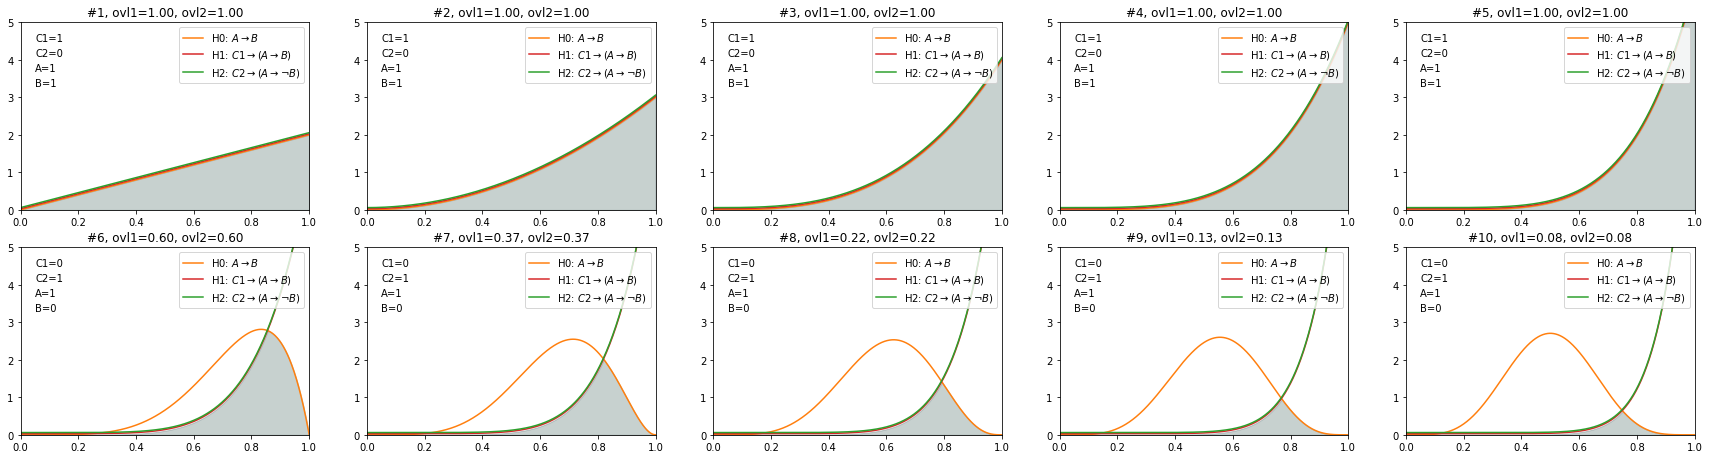

In [60]:
contextual_effect_implication(data)